# wweek 3
## Gradient Descent and optimization
### part 2: experiment with different learning rates and batch sizes

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import load_iris

In [5]:
# Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target.reshape(-1, 1)  # Labels reshaped for OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)  # One-hot encode labels

scaler = StandardScaler()
X = scaler.fit_transform(X)  # Standardize features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [7]:
# Define the MLP class with SGD and varying learning rates &amp; batch sizes
class MLP:

    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, epochs=1000,
    batch_size=1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        error = y - output
        d_output = error * sigmoid_derivative(output)
        error_hidden = np.dot(d_output, self.W2.T)
        d_hidden = error_hidden * sigmoid_derivative(self.a1)

        # Update weights and biases using SGD
        self.W2 += np.dot(self.a1.T, d_output) * self.learning_rate
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * self.learning_rate

        self.W1 += np.dot(X.T, d_hidden) * self.learning_rate
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * self.learning_rate

        return np.mean(np.abs(error))

    def train(self, X, y):
        self.losses = []
        for epoch in range(self.epochs):
            indices = np.random.permutation(X.shape[0])
            X_shuffled, y_shuffled = X[indices], y[indices]

            for i in range(0, X.shape[0], self.batch_size): # Mini-batch processing
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]
                output = self.forward(X_batch)
                loss = self.backward(X_batch, y_batch, output)
                self.losses.append(loss)
                if epoch % 100 == 0:
                    print(f'Epoch {epoch}, Loss: {loss:.4f}')

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

In [8]:
# Experiment with different learning rates and batch sizes
learning_rates = [0.01, 0.1, 0.5]
batch_sizes = [1, 8, 16]

for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f'Experimenting with Learning Rate: {lr}, Batch Size: {batch_size}')
        mlp = MLP(input_size=4, hidden_size=5, output_size=3, learning_rate=lr, epochs=1000,
        batch_size=batch_size)
        mlp.train(X_train, y_train)

Experimenting with Learning Rate: 0.01, Batch Size: 1
Epoch 0, Loss: 0.1992
Epoch 0, Loss: 0.2291
Epoch 0, Loss: 0.1774
Epoch 0, Loss: 0.5019
Epoch 0, Loss: 0.4086
Epoch 0, Loss: 0.7308
Epoch 0, Loss: 0.1957
Epoch 0, Loss: 0.4820
Epoch 0, Loss: 0.4718
Epoch 0, Loss: 0.2085
Epoch 0, Loss: 0.4921
Epoch 0, Loss: 0.4064
Epoch 0, Loss: 0.2210
Epoch 0, Loss: 0.4977
Epoch 0, Loss: 0.1711
Epoch 0, Loss: 0.1881
Epoch 0, Loss: 0.7222
Epoch 0, Loss: 0.7340
Epoch 0, Loss: 0.7447
Epoch 0, Loss: 0.7351
Epoch 0, Loss: 0.2788
Epoch 0, Loss: 0.7201
Epoch 0, Loss: 0.4784
Epoch 0, Loss: 0.2155
Epoch 0, Loss: 0.7365
Epoch 0, Loss: 0.2255
Epoch 0, Loss: 0.1798
Epoch 0, Loss: 0.4557
Epoch 0, Loss: 0.4669
Epoch 0, Loss: 0.5050
Epoch 0, Loss: 0.3955
Epoch 0, Loss: 0.7246
Epoch 0, Loss: 0.7385
Epoch 0, Loss: 0.7323
Epoch 0, Loss: 0.4826
Epoch 0, Loss: 0.4961
Epoch 0, Loss: 0.5233
Epoch 0, Loss: 0.1867
Epoch 0, Loss: 0.1942
Epoch 0, Loss: 0.2266
Epoch 0, Loss: 0.7500
Epoch 0, Loss: 0.4882
Epoch 0, Loss: 0.7266


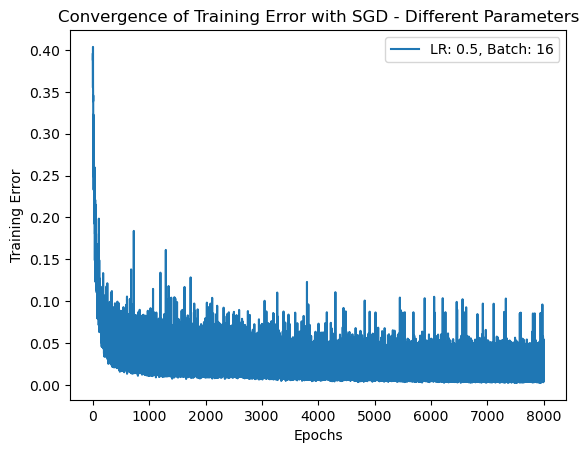

In [9]:
# plot the loss
plt.plot(mlp.losses, label=f'LR: {lr}, Batch: {batch_size}')

plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.title('Convergence of Training Error with SGD - Different Parameters')
plt.legend()
plt.show()

In [11]:
#Evaluate the best-performing model (last trained model)
predictions = mlp.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test_labels)
print(f'Test Accuracy with LR: {lr}, Batch Size: {batch_size} => {accuracy * 100:.2f}')

Test Accuracy with LR: 0.5, Batch Size: 16 => 96.67
